# **Fauture selection & Logistic regression**

**Mobile Price Classification**
> classify mobile price range

# STEPS
1. [Import libraries](#Import_libraries)
2. [Load data](#Load_data)
3. [Look at data and Data cleansing](#Look_at_data_and_Data_cleansing)
4. [Delete & add columns](#Delete_add_columns)
5. [Data Visualization](#Data_Visualization)
6. [Splite and Scale data](#Splite_and_Scale_data)
7. [Model Function](#Model_Function)
8. [Fauture selection](#Fauture_selection)
    1. [With all feautres](#With_all_feautres)
    2. [ram & price](#ram_&_price)
    3. [Forward Backward](#ForwardBackward)
    4. [PCA](#PCA)
9. [Inbalance data](#Inbalance_data)
10. [Predict](#Predict)

<a id="Import_libraries"></a>
# Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score 

In [3]:
# Show plots in jupyter lab
%matplotlib inline 

<a id="Load_data"></a>
# Load data

In [4]:
df_org = pd.read_csv("train.csv")
df_org_test = pd.read_csv("test.csv")
df = df_org.copy()
df_test = df_org_test.copy()

<a id="3"></a>
# Look at data and Data cleansing

In [5]:
print(df.shape)
print(df_test.shape)

(2000, 21)
(1000, 21)


> Rows: 2000<br>
Columns: 21

In [6]:
pd.set_option('display.max_columns', None)
df.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2


In [7]:
df_test.head(3)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1


<a id='31'></a>
## Not usefull columns

In [8]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

> All columns are usefull

<a id='32'></a>
## Types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

> Types are ok

<a id='33'></a>
## Duplicate

In [10]:
df.duplicated().sum()

0

<a id='34'></a>
## Null items

In [11]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

> there is no Null item 

<a id='35'></a>
## Outliers

In [12]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [13]:
# Return unbiased kurtosis over requested axis using Fisher's definition of kurtosis (kurtosis of normal == 0.0).
# The result is normalized by N-1
kurt = df.kurt()[:]
kurt

battery_power   -1.224144
blue            -2.001602
clock_speed     -1.323417
dual_sim        -2.000555
fc               0.277076
four_g          -1.994575
int_memory      -1.216074
m_dep           -1.274349
mobile_wt       -1.210376
n_cores         -1.229750
pc              -1.171499
px_height       -0.315865
px_width        -1.186005
ram             -1.191913
sc_h            -1.190791
sc_w            -0.389523
talk_time       -1.218591
three_g         -0.492161
touch_screen    -2.001859
wifi            -2.001217
price_range     -1.360400
dtype: float64

> It's ok 

<a id="Delete_&_add_columns"></a>
# Delete & add columns


In [14]:
df['sc_area'] = df['sc_h'] * df['sc_w']
df['px_area'] = df['px_height'] * df['px_width']
df['full_option'] = df.blue * df.dual_sim * df.four_g * df.touch_screen * df.wifi
df['3_or_4g'] = df.three_g * df.four_g
df['price'] = df.price_range
df.drop(columns=['price_range'], axis=1, inplace=True)

In [15]:
mask = (df.full_option == 1)
df[mask]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,sc_area,px_area,full_option,3_or_4g,price
25,961,1,1.4,1,0,1,57,0.6,114,8,3,291,1434,2782,18,9,7,1,1,1,162,417294,1,1,2
70,1448,1,0.5,1,6,1,45,0.8,138,7,11,570,1724,3378,13,11,2,1,1,1,143,982680,1,1,3
80,1589,1,0.6,1,0,1,58,0.9,85,7,7,319,1206,3464,19,10,6,1,1,1,190,384714,1,1,3
84,1127,1,2.9,1,5,1,57,0.8,163,1,13,928,1049,2048,11,5,17,1,1,1,55,973472,1,1,1
160,1481,1,0.7,1,4,1,37,0.6,96,5,13,116,1533,2945,10,5,16,1,1,1,50,177828,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1898,684,1,0.9,1,3,1,63,1.0,157,5,9,159,1738,3756,17,5,12,1,1,1,85,276342,1,1,3
1923,1056,1,2.1,1,8,1,37,0.7,101,3,11,914,979,2651,15,5,3,1,1,1,75,894806,1,1,2
1932,718,1,1.6,1,1,1,30,0.4,93,3,12,662,997,1601,10,9,12,1,1,1,90,660014,1,1,1
1980,930,1,1.0,1,4,1,4,0.9,144,8,10,1017,1289,2016,13,10,16,1,1,1,130,1310913,1,1,1


<a id='Data_Visualization'></a>
# Data Visualization

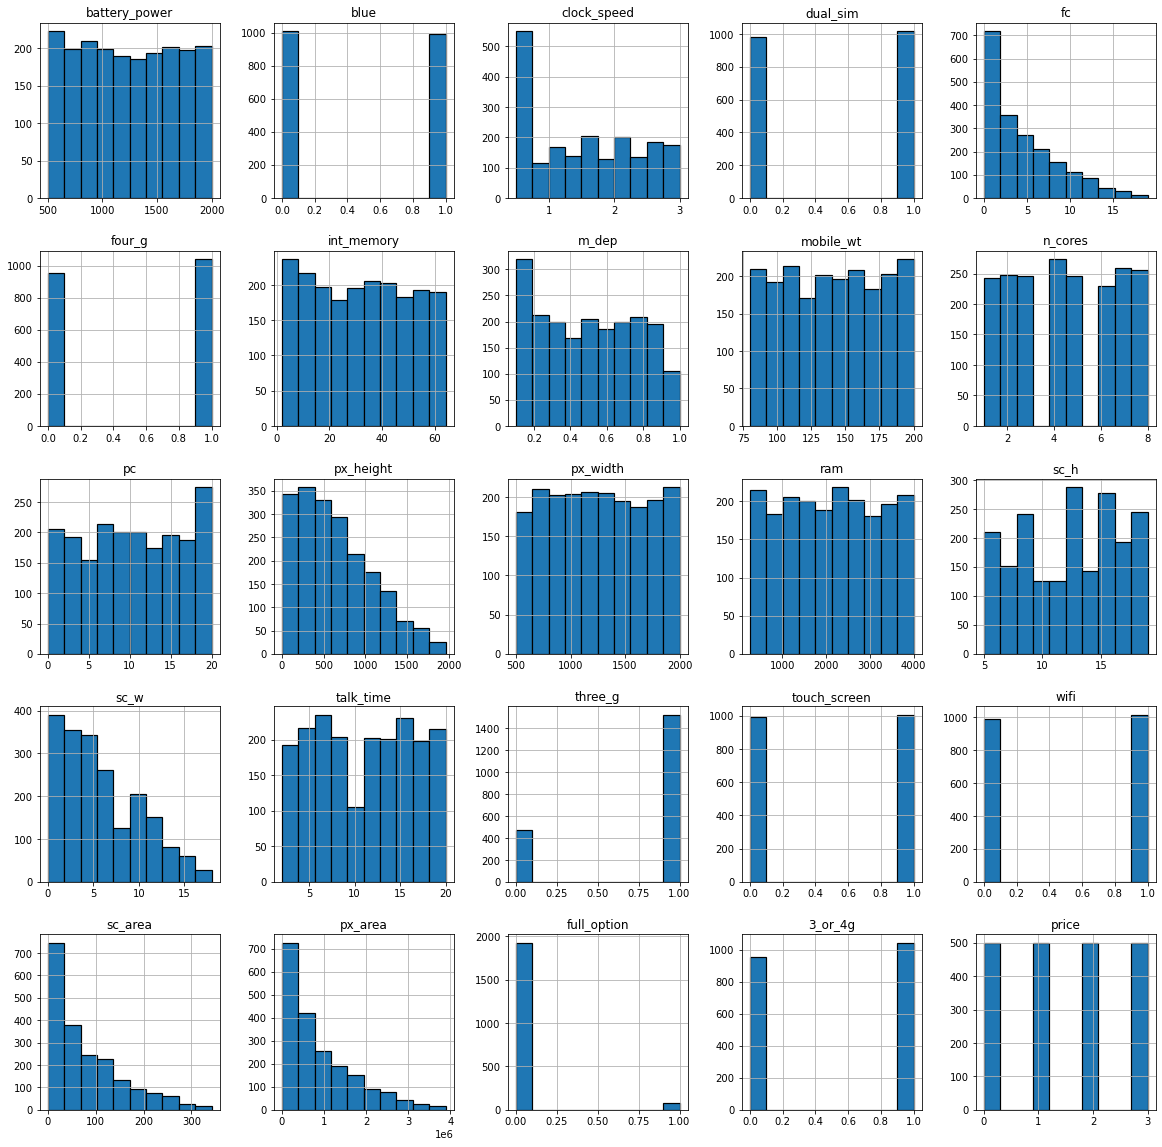

In [16]:
# Visualizing the distribution for every "feature"
df.hist(edgecolor="black", linewidth=1.2, figsize=(20, 20))
plt.show()

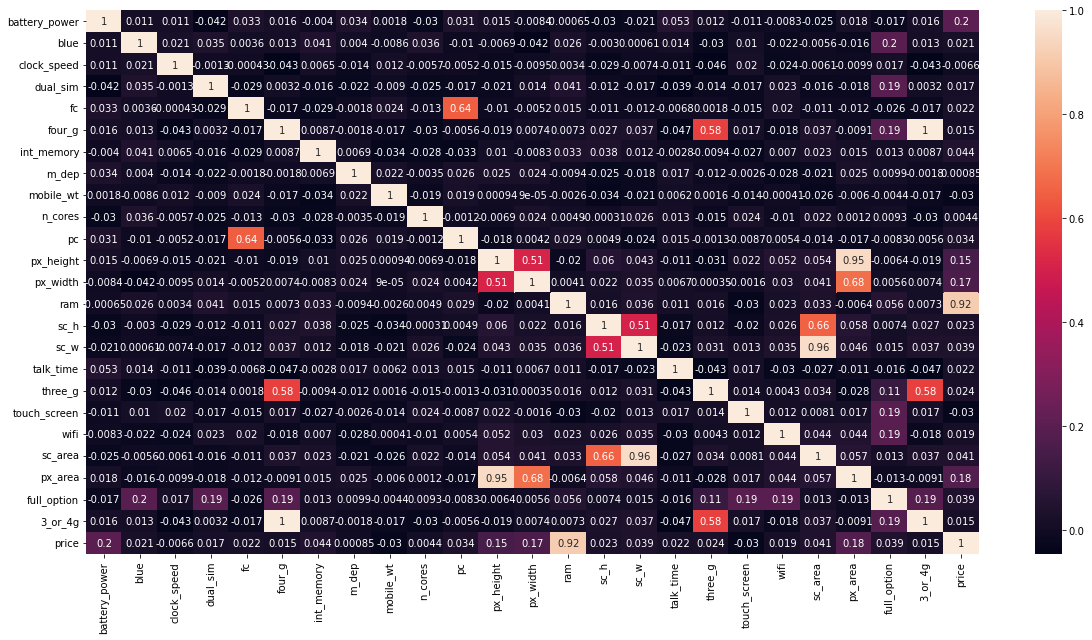

In [17]:
# correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

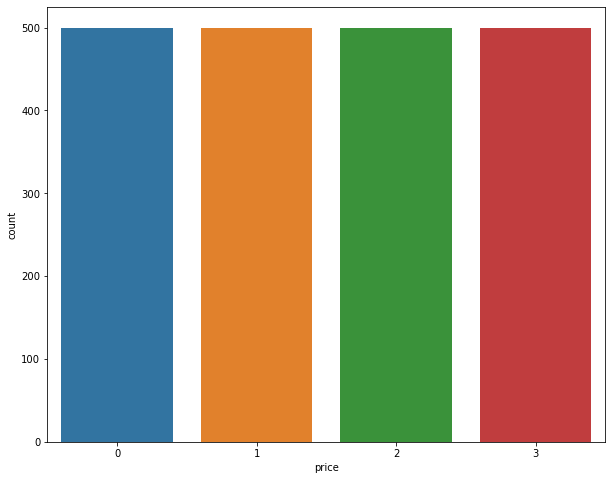

In [18]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x = df["price"])

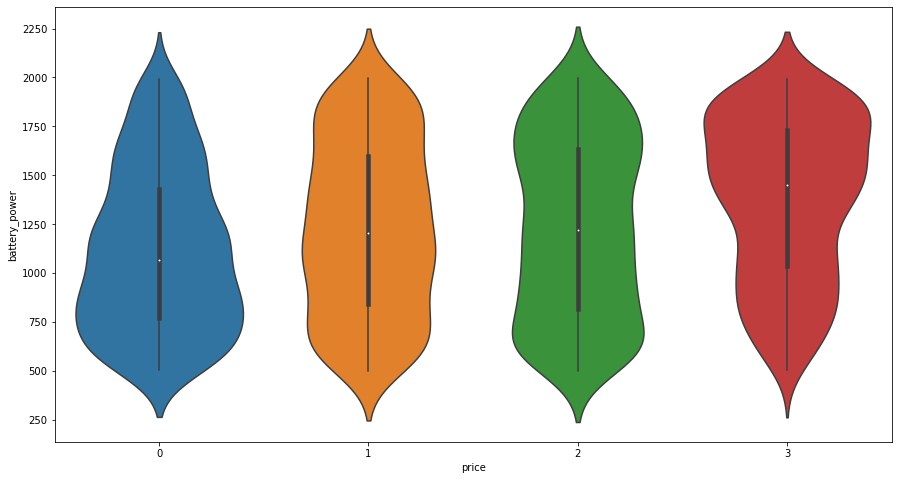

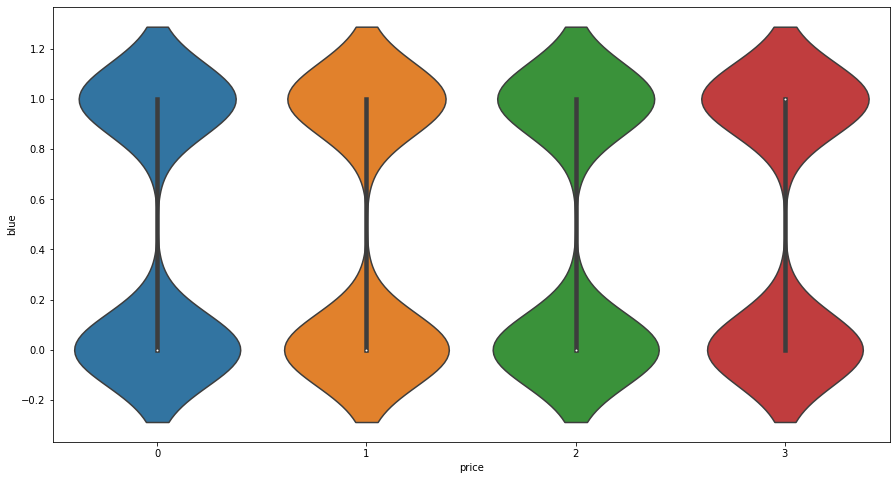

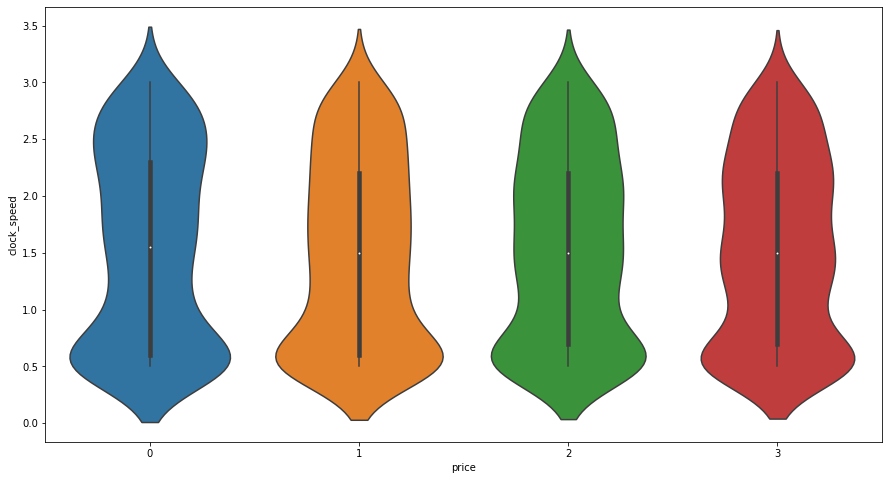

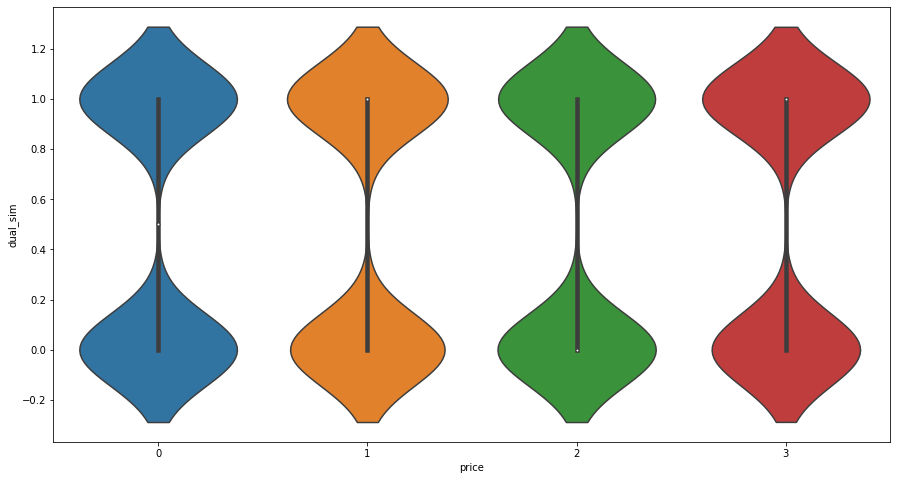

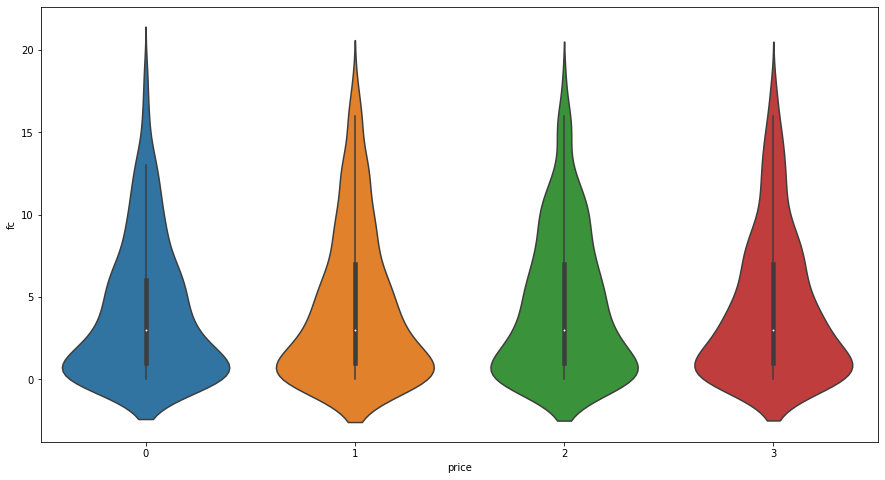

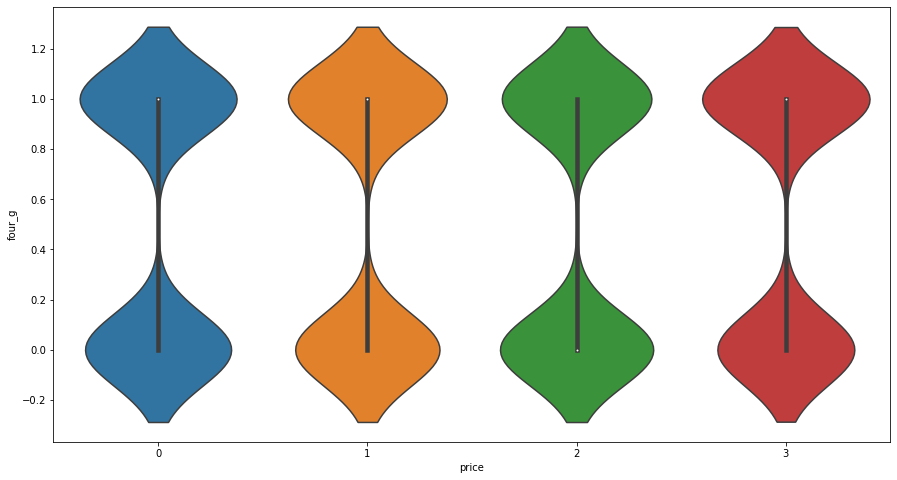

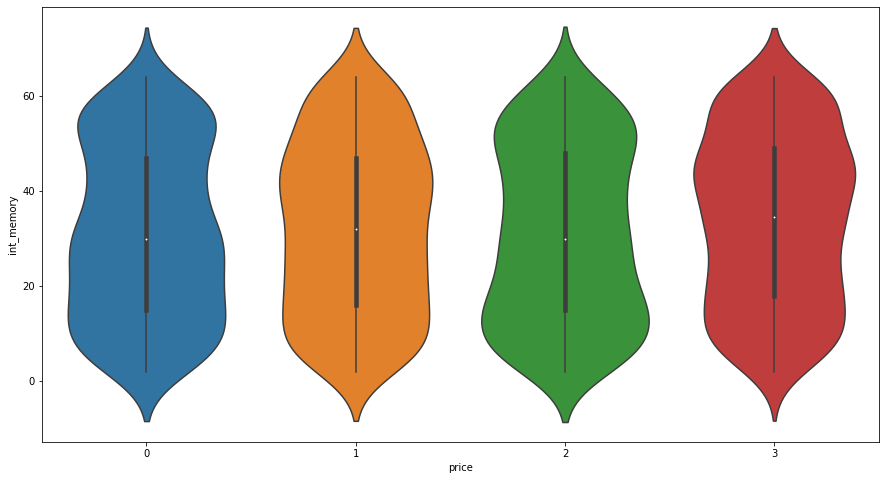

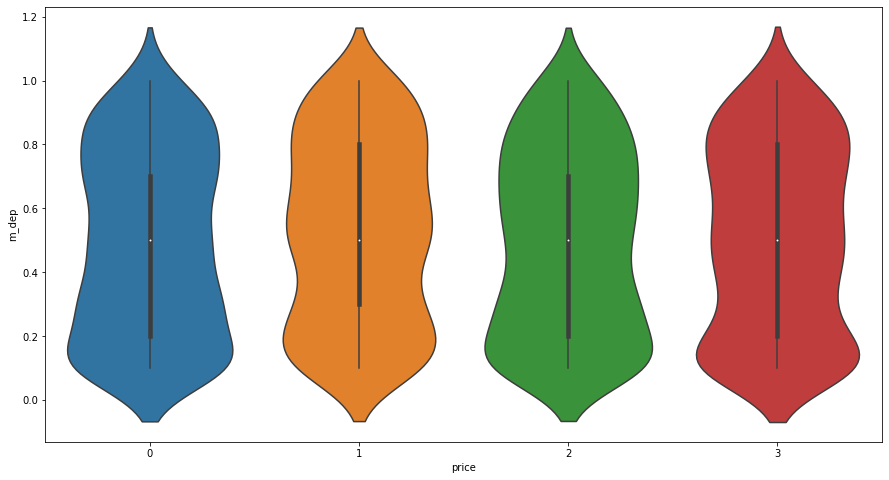

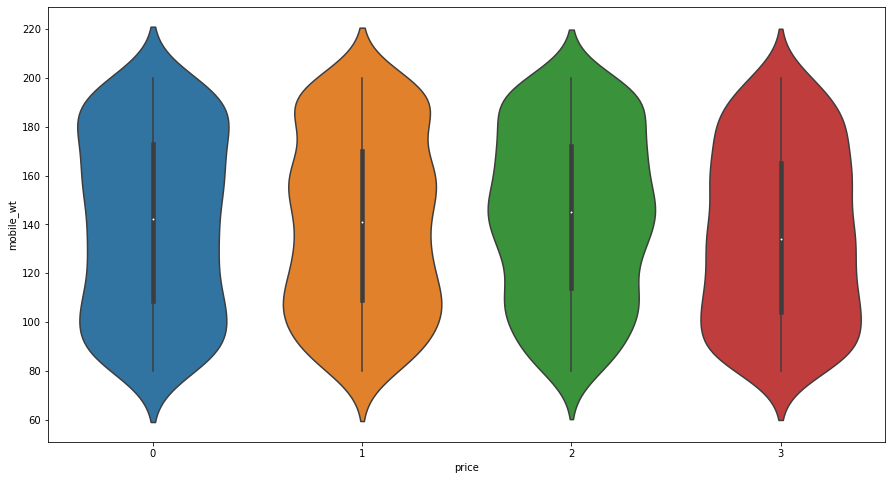

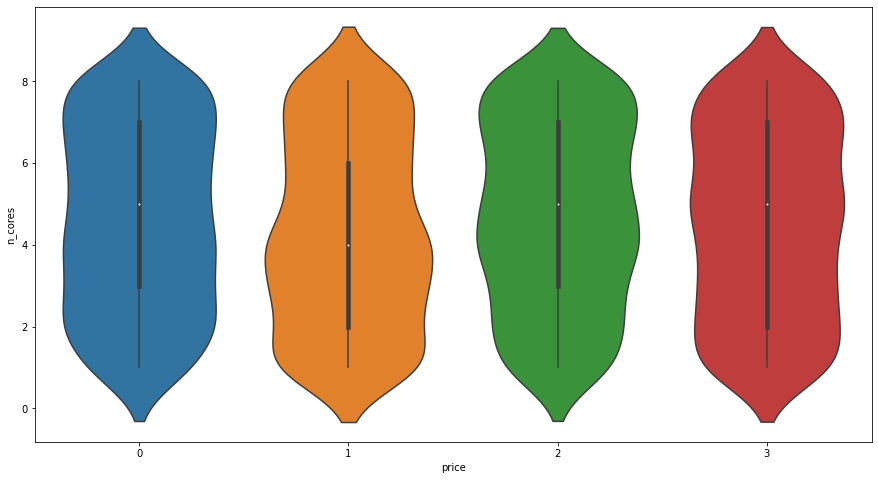

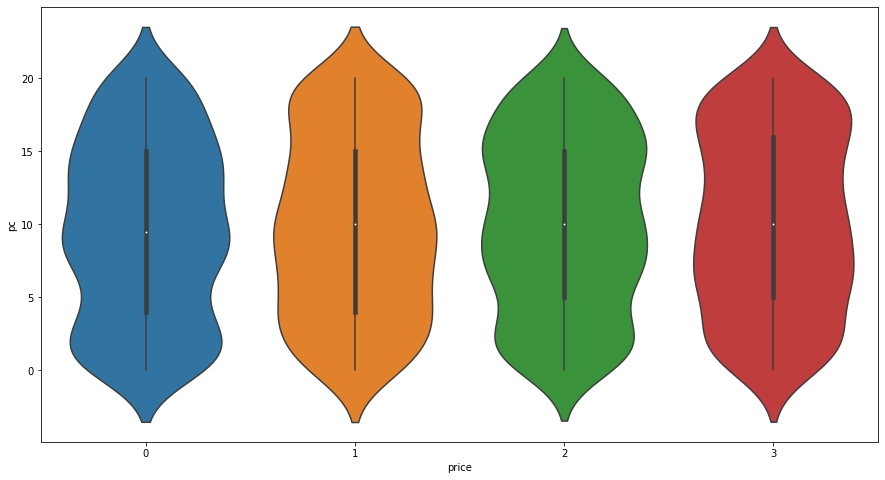

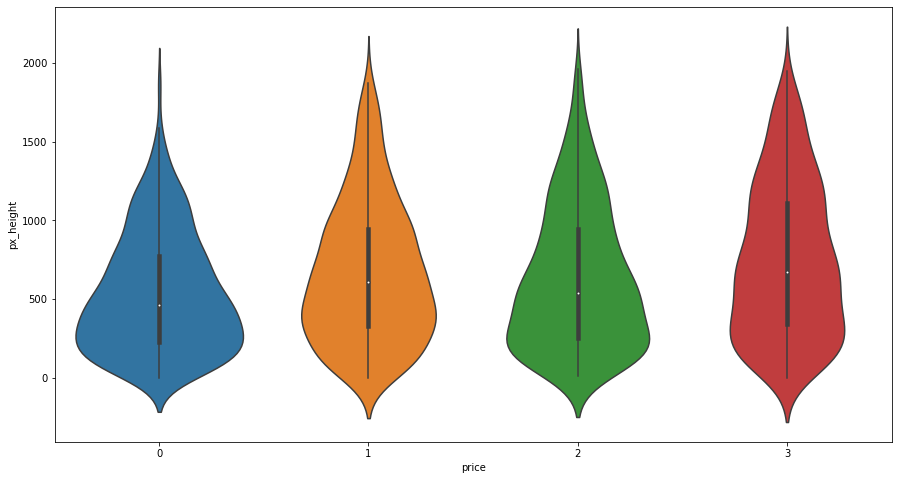

In [19]:
for col in df.columns[:12]:
    plt.figure(figsize=(15,8))
    sns.violinplot(x="price", y=col, data=df)

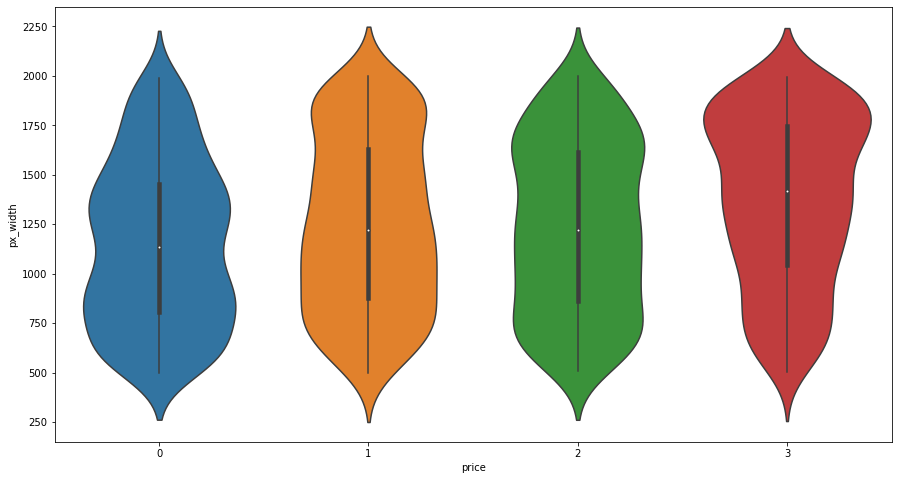

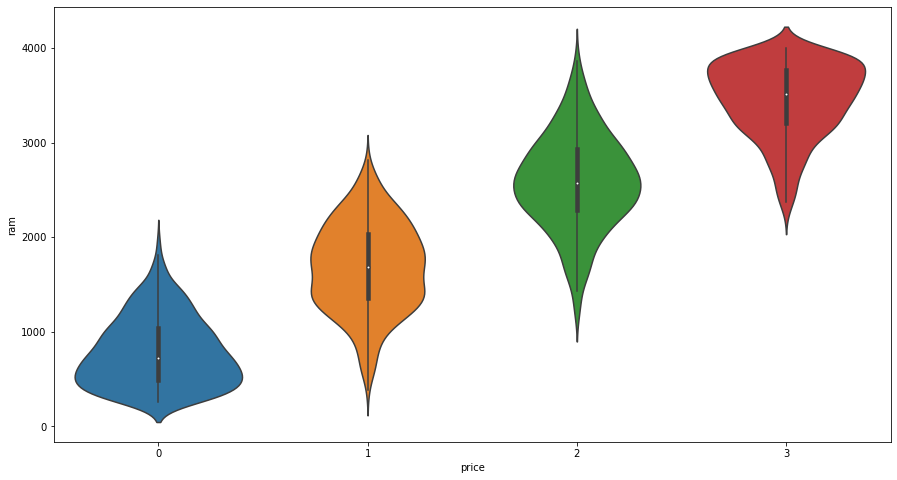

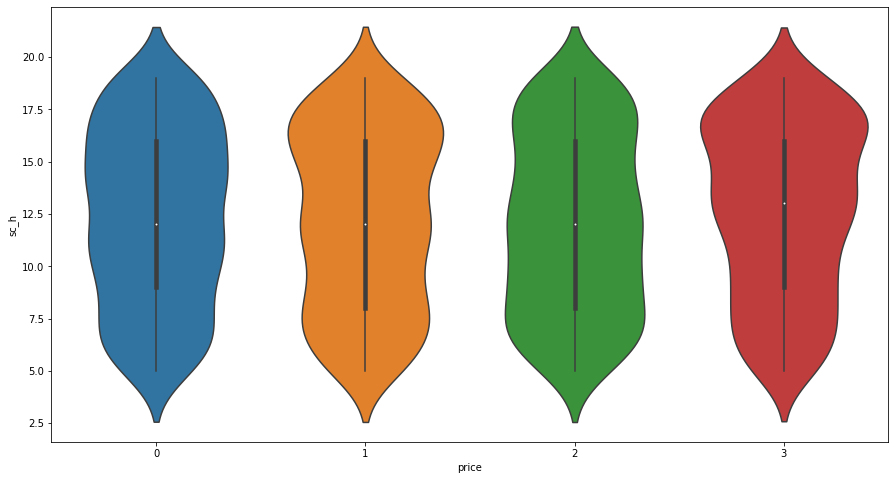

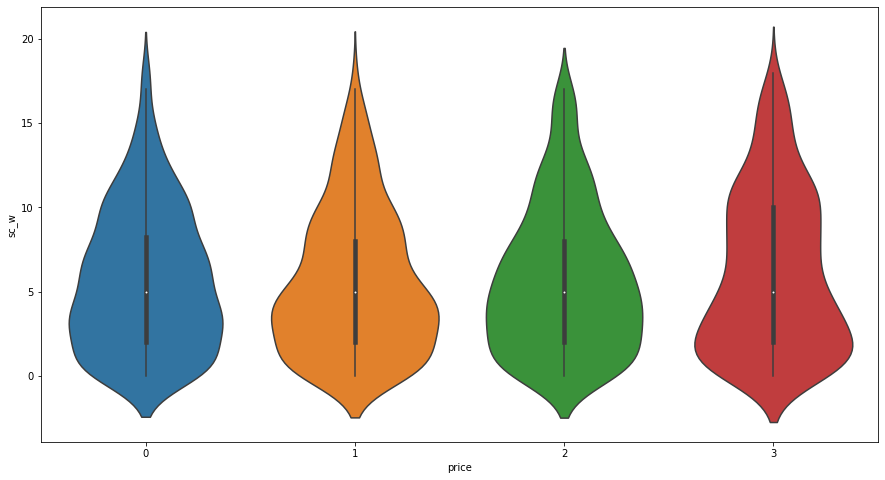

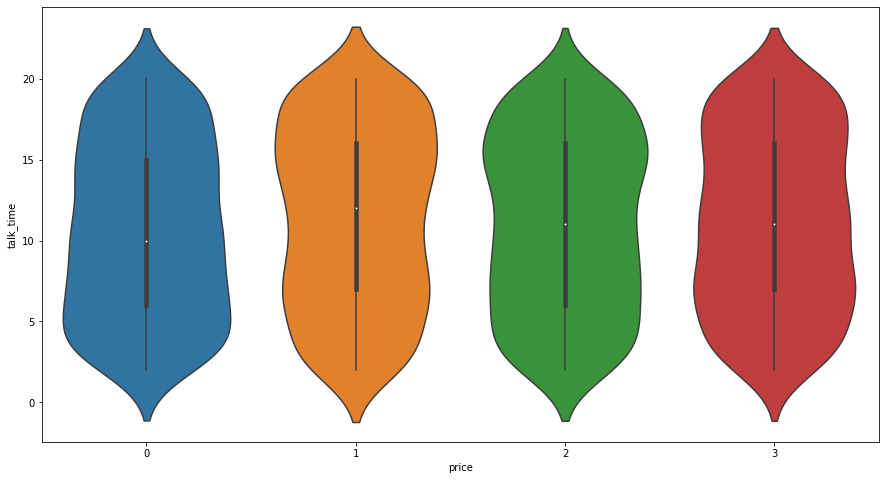

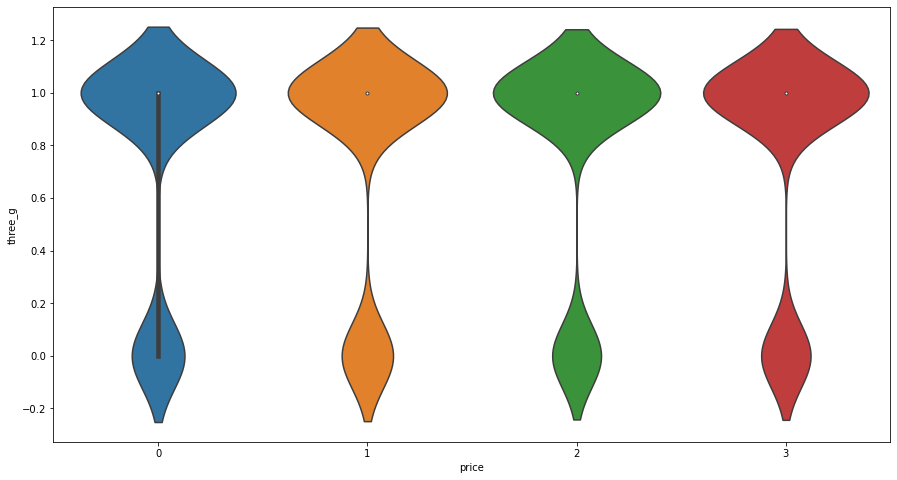

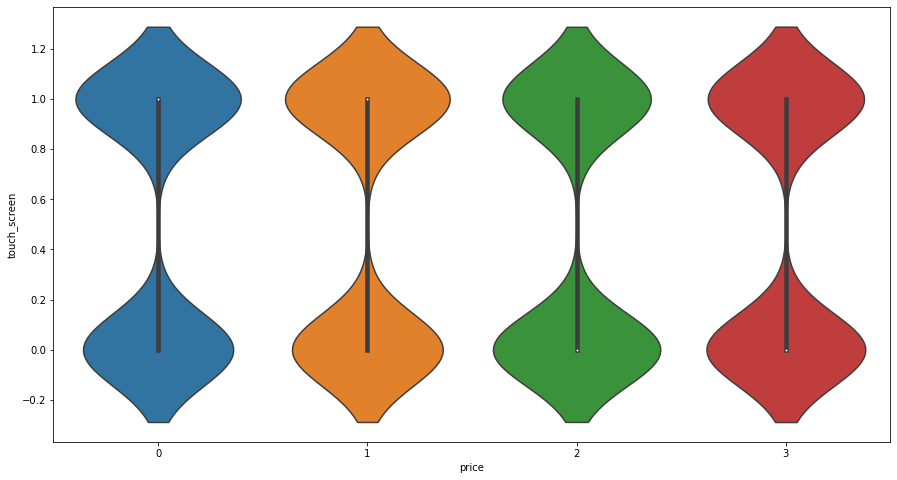

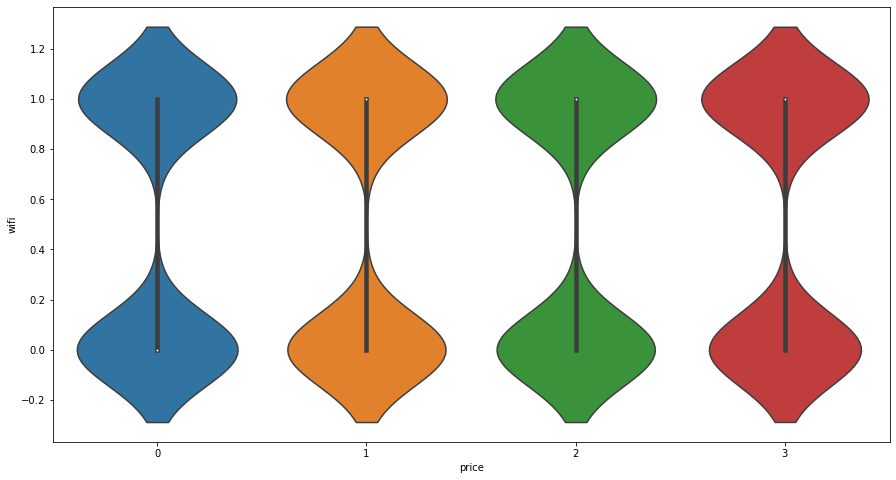

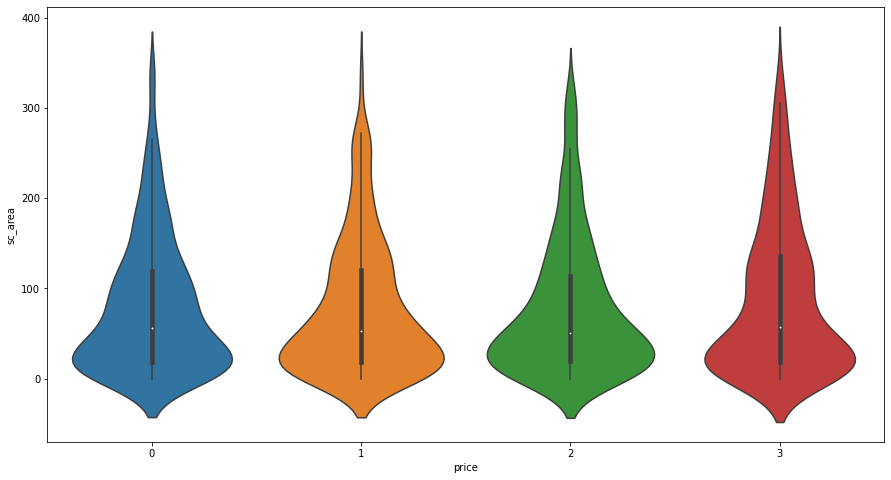

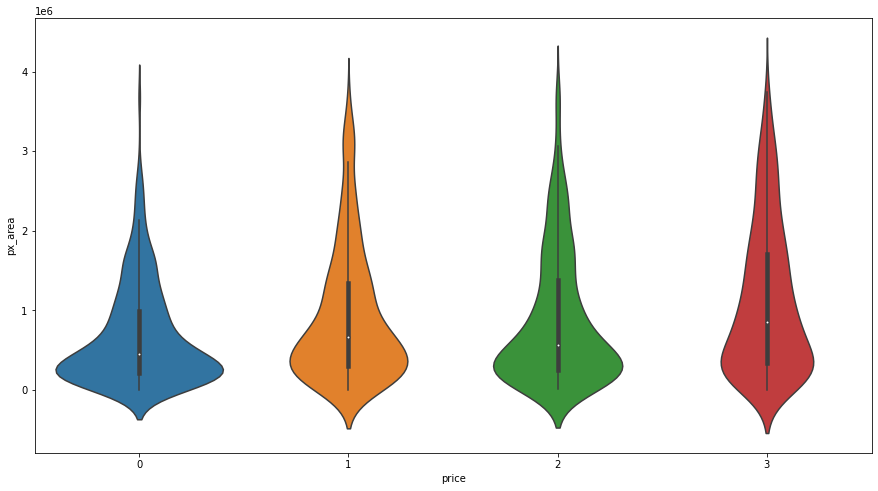

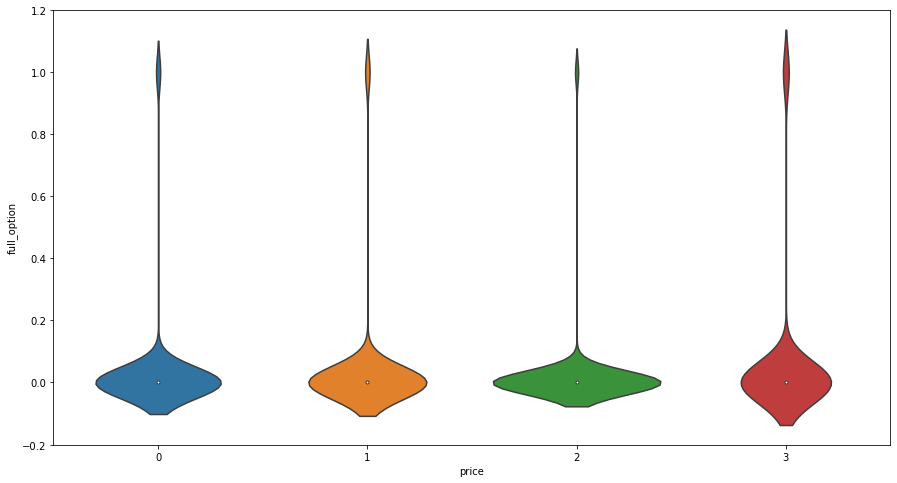

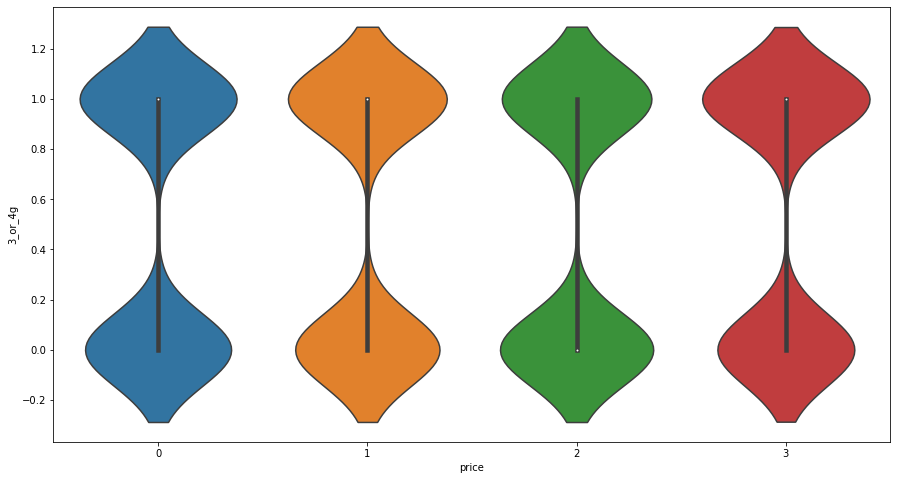

In [20]:
for col in df.columns[12:-1]:
    plt.figure(figsize=(15,8))
    sns.violinplot(x="price", y=col, data=df)

<a id="ram"></a>
> **ram** is so important

<a id="Splite_and_Scale_data"></a>
# Splite and Scale data

In [21]:
y = df['price']
X = df.copy()
X.drop(columns='price', axis=1, inplace=True)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_train.shape)

(1600, 24)
(1600,)
(400, 24)
(1600,)


In [24]:
y_train.head()

582     0
159     1
1827    3
318     0
708     3
Name: price, dtype: int64

In [25]:
X_train.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,sc_area,px_area,full_option,3_or_4g
582,1232,0,2.9,1,1,1,24,0.3,169,5,17,361,809,1257,16,10,16,1,0,0,160,292049,0,1
159,1840,0,0.5,1,12,0,34,0.7,142,1,16,311,1545,1078,8,0,10,0,0,0,0,480495,0,0
1827,1692,0,2.1,0,4,1,2,0.9,106,1,17,1899,1904,3779,9,3,7,1,1,1,27,3615696,0,1


In [26]:
scaler = StandardScaler()

In [27]:
fit_X = scaler.fit(X_train)

In [28]:
X_train = fit_X.transform(X_train)
X_test = fit_X.transform(X_test)

In [29]:
X_train = pd.DataFrame(data=X_train, columns=X.columns)
X_test = pd.DataFrame(data=X_test, columns=X.columns)
# y_train = pd.DataFrame(data=y_train, columns=['price'])
# y_test = pd.DataFrame(data=y_test, columns=['price'])

In [30]:
X_train.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,sc_area,px_area,full_option,3_or_4g
0,-0.001608,-0.965592,1.671035,0.983880,-0.748114,0.976525,-0.430667,-0.692543,0.852842,0.216380,1.183752,-0.660982,-1.042159,-0.786095,0.882404,0.951809,0.911171,0.564840,-0.986343,-1.025320,1.018210,-0.758192,-0.19567,0.976525
1,1.374075,-0.965592,-1.270550,0.983880,1.810037,-1.024039,0.119443,0.693843,0.084708,-1.543255,1.018941,-0.773314,0.655005,-0.952286,-1.032614,-1.324225,-0.183466,-1.770414,-0.986343,-1.025320,-1.048238,-0.531980,-0.19567,-1.024039
2,1.039205,-0.965592,0.690506,-1.016384,-0.050436,0.976525,-1.640908,1.387036,-0.939471,-1.543255,1.183752,2.794355,1.482833,1.555428,-0.793236,-0.641415,-0.730784,0.564840,1.013846,0.975305,-0.699525,3.231534,-0.19567,0.976525


In [31]:
y_train.head(3)

582     0
159     1
1827    3
Name: price, dtype: int64

In [32]:
X_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,sc_area,px_area,full_option,3_or_4g
0,0.500697,1.035635,-1.270550,0.983880,-0.748114,-1.024039,0.119443,0.693843,-1.593807,-0.223529,-1.123596,-0.910359,-0.525631,1.221190,-1.271991,-0.186208,-1.095663,0.564840,1.013846,-1.025320,-0.596202,-0.798764,-0.19567,-1.024039
1,-0.318377,1.035635,-1.270550,0.983880,1.344919,-1.024039,-1.145809,0.000650,0.795943,-0.663437,0.689320,-0.420591,-1.590970,-1.268884,0.403650,-0.413811,-0.001026,-1.770414,1.013846,-1.025320,-0.324981,-0.787987,-0.19567,-1.024039
2,0.659082,1.035635,0.322808,0.983880,-0.980673,-1.024039,-1.200820,0.347246,0.995089,-0.223529,-1.453217,-1.126037,-1.639394,0.533217,0.882404,-0.186208,0.363853,0.564840,-0.986343,0.975305,-0.015014,-1.007095,-0.19567,-1.024039
3,1.299408,1.035635,0.690506,-1.016384,-0.515555,-1.024039,0.944607,1.040440,-0.398932,-1.543255,0.030078,-0.714901,0.283750,-0.183538,1.121782,1.634619,0.363853,-1.770414,1.013846,0.975305,1.806043,-0.548890,-0.19567,-1.024039
4,-0.331953,1.035635,0.200242,0.983880,-0.980673,0.976525,0.614541,-1.039140,-0.797224,0.656289,-1.453217,-1.346208,-0.255837,1.096779,-0.314482,-0.186208,1.093610,0.564840,1.013846,-1.025320,-0.337897,-1.031463,-0.19567,0.976525


<a id="Model_Function"></a>
# Model function

In [33]:
def LR(X_train, y_train, X_test, y_test, i):
    LR = LogisticRegression()
    LR = LR.fit(X_train, y_train)
    yhat = LR.predict(X_test)
    acc = accuracy_score(y_test, yhat)
    if isinstance(i, int):
        #Forward, Backward selection we need acc
        if i == 22:
            return acc
        #pca we need acc
        elif 0 < i < 16:
            return acc
        #Inbalance data
        elif i == 0 :
            message = f"Accuracy of sklearn's Logistic Regression Classifier: {acc}"
            return (message, yhat)
        #predict test data we need model
        elif i == 23:
            return LR
    #all features ,ram
    else:
        message = f"Accuracy of sklearn's Logistic Regression Classifier with {i}: {acc}"
        return (message, yhat)

<a id="Fauture_selection"></a>
# Fauture selection 

<a id="With_all_feautres"></a>
## With all feautres 

In [34]:
message, yhat = LR(X_train, y_train, X_test, y_test, "all_features")
print(message)
print(classification_report(y_test, yhat))

Accuracy of sklearn's Logistic Regression Classifier with all_features: 0.96
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        95
           1       0.95      0.95      0.95        92
           2       0.96      0.92      0.94        99
           3       0.96      0.99      0.97       114

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



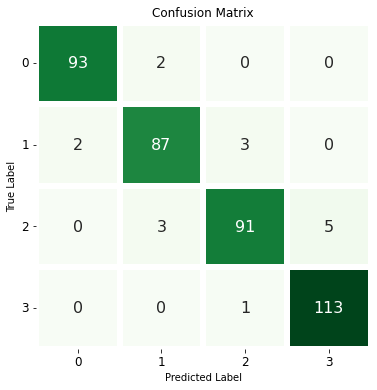

In [35]:
cm = confusion_matrix(y_test, yhat)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

<a id="ram_&_price"></a>
## [ram & price](#ram)

In [36]:
X_train_ram, X_test_ram = X_train['ram'], X_test['ram'],
X_train_ram = pd.DataFrame(X_train_ram,columns=['ram'])
X_test_ram = pd.DataFrame(X_test_ram,columns=['ram'])

In [37]:
message, yhat = LR(X_train_ram, y_train, X_test_ram, y_test, i="ram")
print(message)

Accuracy of sklearn's Logistic Regression Classifier with ram: 0.7725


<a id="ForwardBackward"></a>
# Forward, Backward selection

In [38]:
def forward(X_train, y_train, X_test, y_test, best_cols, all_cols):
    init_acc = 0
    for col in all_cols:
        best_cols.append(col)
        X_train_f = pd.DataFrame(data=X_train, columns=best_cols)
        X_test_f = pd.DataFrame(data=X_test, columns=best_cols)
        acc = LR(X_train_f, y_train, X_test_f, y_test, i=22)
        if acc > init_acc:
            init_acc = acc
        else:
            best_cols.pop()
    return(best_cols, init_acc)

In [39]:
best_cols, all_cols = [], X.columns.to_list()
forward_col = forward(X_train, y_train, X_test, y_test, best_cols, all_cols)
print(forward_col)

(['battery_power', 'blue', 'px_height', 'ram', 'sc_h', 'px_area'], 0.925)


In [40]:
def backward(X_train, y_train, X_test, y_test, all_cols):
    init_acc = 0
    for i in range(len(all_cols)-1):
        col = all_cols.pop(0)
        X_train_b = pd.DataFrame(data=X_train, columns=all_cols)
        X_test_b = pd.DataFrame(data=X_test, columns=all_cols)
        acc = LR(X_train_b, y_train, X_test_b, y_test, i=22)
        if acc > init_acc:
            init_acc = acc
            all_cols.append(col)
    return(all_cols, init_acc)

In [41]:
all_cols = X.columns.to_list()
backward_col = backward(X_train, y_train, X_test, y_test, all_cols)
print(backward_col)

(['3_or_4g', 'battery_power', 'blue', 'dual_sim', 'int_memory'], 0.9675)


In [42]:
import statsmodels.api as sm

In [43]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [44]:
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [45]:
forward_selection = forward_selection(X, y)
backward_selection = backward_elimination(X, y)
forward_train = pd.DataFrame(data=X_train, columns=forward_selection)
forward_test = pd.DataFrame(data=X_test, columns=forward_selection)
backward_train = pd.DataFrame(data=X_train, columns=backward_selection)
backward_test = pd.DataFrame(data=X_test, columns=backward_selection)
forward_acc = LR(forward_train, y_train, forward_test, y_test, i=22)
backward_acc = LR(backward_train, y_train, backward_test, y_test, i=22)
print(f'forward selection with sm.OLS => {forward_selection} {forward_acc}')
print(f'backward selection with sm.OLS => {backward_selection} {backward_acc}')

<ipython-input-43-d9aa104cd376>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-43-d9aa104cd376>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-43-d9aa104cd376>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-43-d9aa104cd376>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


forward selection=> ['ram', 'battery_power', 'px_area', 'px_width', 'mobile_wt', 'px_height', 'int_memory'] 0.975
backward selection=> ['battery_power', 'int_memory', 'mobile_wt', 'px_height', 'px_width', 'ram'] 0.9725


In [46]:
print(f'forward selection with sm.OLS => {forward_selection} {forward_acc}')
print(f'backward selection with sm.OLS => {backward_selection} {backward_acc}')
print(f'forward           => {forward_col}')
print(f'backward          => {backward_col}')

forward selection => ['ram', 'battery_power', 'px_area', 'px_width', 'mobile_wt', 'px_height', 'int_memory'] 0.975
backward selection=> ['battery_power', 'int_memory', 'mobile_wt', 'px_height', 'px_width', 'ram'] 0.9725
forward           => (['battery_power', 'blue', 'px_height', 'ram', 'sc_h', 'px_area'], 0.925)
backward          => (['3_or_4g', 'battery_power', 'blue', 'dual_sim', 'int_memory'], 0.9675)


<a id="PCA"></a>
# PCA

In [47]:
dic = {}
for i in range(2,16):
    pca = PCA(n_components=i)
    pca.fit(X_train)
    pca_train = pd.DataFrame()
    pca_test = pd.DataFrame()
    pca_train = pd.DataFrame(
        data = pca.transform(X_train), 
        columns =[
        "pca"+str(i) for i in range(1, i+1)
])
    pca_test = pd.DataFrame(
        data = pca.transform(X_test), 
        columns =[
        "pca"+str(i) for i in range(1, i+1)
])
    
    dic[i] = LR(pca_train, y_train, pca_test, y_test, i)
dic

{2: 0.305,
 3: 0.2925,
 4: 0.31,
 5: 0.33,
 6: 0.3675,
 7: 0.43,
 8: 0.43,
 9: 0.4375,
 10: 0.4425,
 11: 0.52,
 12: 0.5125,
 13: 0.53,
 14: 0.5625,
 15: 0.95}

<a id="Inbalance_data"></a>
# Inbalance data

In [48]:
y_train.head()

582     0
159     1
1827    3
318     0
708     3
Name: price, dtype: int64

In [49]:
def filter(x):
    if x > 0:
        x = 1
        return x
    else:
        return 0

In [50]:
y_train_in = pd.DataFrame(data=y_train, columns=['price'])
y_test_in = pd.DataFrame(data=y_test, columns=['price'])

In [51]:
y_train_in = y_train_in.copy()
y_test_in = y_test_in.copy()

In [52]:
y_train_in.price = y_train_in.price.apply(filter)
y_test_in.price = y_test_in.price.apply(filter)

In [53]:
y_train_in.head()

,price
582,0
159,1
1827,1
318,0
708,1


/home/tweet/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


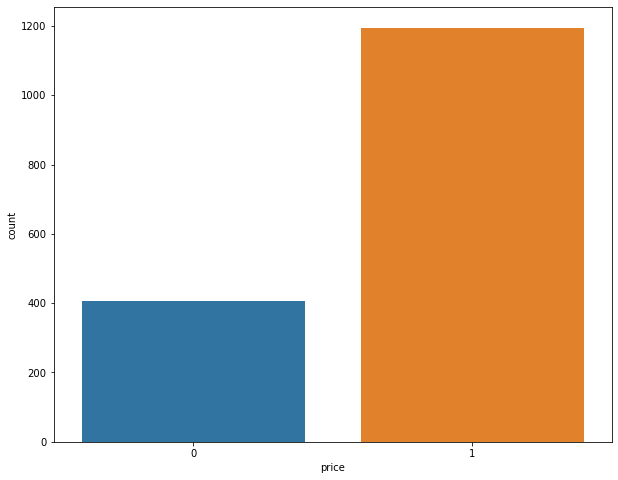

In [54]:
plt.figure(figsize=(10,8))
ax = sns.countplot(y_train_in.price)

/home/tweet/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


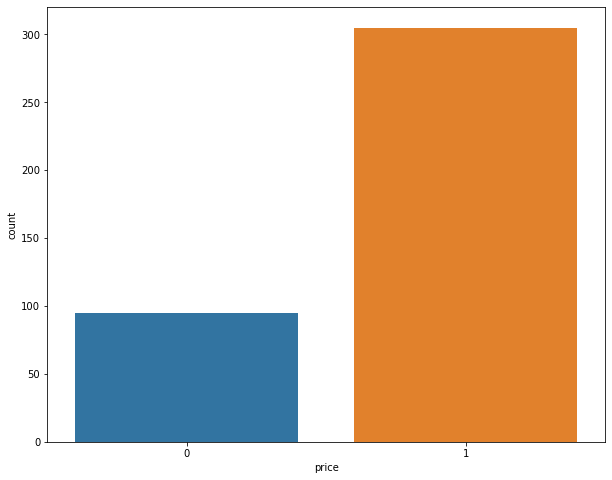

In [55]:
plt.figure(figsize=(10,8))
ax = sns.countplot(y_test_in.price)

In [56]:
message, yhat = LR(X_train, y_train_in, X_test, y_test_in, 0)
print(message)

Accuracy of sklearn's Logistic Regression Classifier: 0.99


/home/tweet/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [57]:
y_test_in

,price
405,1
1190,0
1132,1
731,1
1754,1
...,...
638,1
360,1
1810,0
1743,1


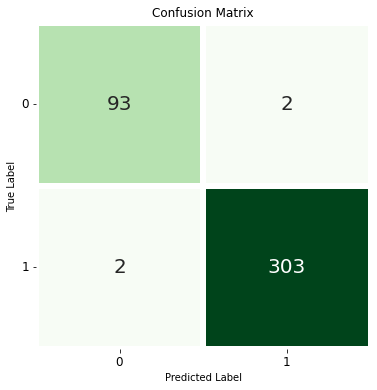

In [58]:
cm = confusion_matrix(y_test_in, yhat)

df1 = pd.DataFrame(columns=["0","1"], index= ["0","1"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 20})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

In [59]:
y_test_in.value_counts()

price
1        305
0         95
dtype: int64

# Predict

In [60]:
df_test['sc_area'] = df['sc_h'] * df['sc_w']
df_test['px_area'] = df['px_height'] * df['px_width']
df_test['full_option'] = df.blue * df.dual_sim * df.four_g * df.touch_screen * df.wifi
df_test['3_or_4g'] = df.three_g * df.four_g
df_test.drop('id', axis=1, inplace=True)
df_test.shape

(1000, 24)

In [61]:
X_train.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,sc_area,px_area,full_option,3_or_4g
0,-0.001608,-0.965592,1.671035,0.983880,-0.748114,0.976525,-0.430667,-0.692543,0.852842,0.216380,1.183752,-0.660982,-1.042159,-0.786095,0.882404,0.951809,0.911171,0.564840,-0.986343,-1.025320,1.018210,-0.758192,-0.19567,0.976525
1,1.374075,-0.965592,-1.270550,0.983880,1.810037,-1.024039,0.119443,0.693843,0.084708,-1.543255,1.018941,-0.773314,0.655005,-0.952286,-1.032614,-1.324225,-0.183466,-1.770414,-0.986343,-1.025320,-1.048238,-0.531980,-0.19567,-1.024039
2,1.039205,-0.965592,0.690506,-1.016384,-0.050436,0.976525,-1.640908,1.387036,-0.939471,-1.543255,1.183752,2.794355,1.482833,1.555428,-0.793236,-0.641415,-0.730784,0.564840,1.013846,0.975305,-0.699525,3.231534,-0.19567,0.976525


In [62]:
df_test.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,sc_area,px_area,full_option,3_or_4g
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0,63,15120,0,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0,51,1799140,0,1
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1,22,2167308,0,1


In [63]:
test_X_train = fit_X.transform(df_test)
test_X_train = pd.DataFrame(data=test_X_train, columns=X.columns)
test_X_train = pd.DataFrame(data=test_X_train, columns=forward_selection)
test_X_train

,ram,battery_power,px_area,px_width,mobile_wt,px_height,int_memory
0,1.274111,-0.429246,-1.090619,0.348316,1.535628,-0.964279,-1.475875
1,1.663127,-0.886299,1.050929,-0.931474,1.478729,0.203976,1.604738
2,0.271397,1.299408,1.492880,0.242244,1.336482,1.381216,-0.265634
3,1.661270,0.708860,1.498244,1.132332,-1.223965,-0.809260,-0.375656
4,-0.307021,0.455445,0.648740,-1.039853,-0.882572,0.210715,0.944607
...,...,...,...,...,...,...,...
995,0.016076,1.057306,1.092409,-0.802342,0.881292,-0.025182,1.219662
996,-0.158471,-1.411230,1.966527,0.855621,1.336482,1.116113,-1.035787
997,-0.817662,-0.107952,-0.770555,-1.005264,-1.679155,-0.400371,-1.310842
998,0.376310,0.679446,0.865370,-0.989122,0.909741,-1.386648,0.999618


In [64]:
LR = LR(forward_train, y_train, forward_test, y_test, i=23)
LR.predict(test_X_train)

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 2, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 0, 2, 2, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 2, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0, 1, 3, 1, 0, 2, 2,
       3, 3, 1, 2, 3, 2, 3, 2, 2, 1, 1, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 2, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 1, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,